In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
house = pd.read_csv("kc_house_data.csv")
df = house.pop('price')
house['price'] = df
date_2_int = lambda x: x.rstrip("T000000")
house.date = house.date.apply(date_2_int)
house.date = house.date.astype(int)
house.set_index('id', inplace=True) # house is unnormalized
data = house
data.iloc[:, :-1] = (house.iloc[:, :-1] - house.iloc[:, :-1].mean()) / house.iloc[:, :-1].std()
data.insert(0, 'ones', 1)
data

,ones,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,,
7129300520,1,0.330101,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.087171,-0.305752,-0.629172,...,-0.734691,-0.658666,-0.544885,-0.210124,1.870108,-0.352564,-0.306072,-0.943333,-0.260709,221900.0
6414100192,1,0.330138,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.087171,-0.305752,-0.629172,...,0.460830,0.245136,-0.681063,4.746568,0.879547,1.161541,-0.746324,-0.432676,-0.187863,538000.0
5631500400,1,0.331806,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.087171,-0.305752,-0.629172,...,-1.229805,-0.658666,-1.293862,-0.210124,-0.933367,1.283507,-0.135652,1.070115,-0.172371,180000.0
2487200875,1,0.330138,0.676469,1.149422,-0.130547,-0.244009,-0.915406,-0.087171,-0.305752,2.444237,...,-0.891678,1.397483,-0.204441,-0.210124,1.085135,-0.283281,-1.271787,-0.914153,-0.284515,604000.0
1954400510,1,0.331805,-0.398728,-0.149004,-0.435412,-0.169649,-0.915406,-0.087171,-0.305752,-0.629172,...,-0.130892,-0.658666,0.544535,-0.210124,-0.073634,0.409541,1.199307,-0.272184,-0.192844,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,1,0.330010,-0.398728,0.500209,-0.598732,-0.337417,2.788374,-0.087171,-0.305752,-0.629172,...,-0.312032,-0.658666,1.293512,-0.210124,0.468371,1.004935,-0.938047,-0.666119,-0.412371,360000.0
6600060120,1,0.331806,0.676469,0.500209,0.250534,-0.224381,0.936484,-0.087171,-0.305752,-0.629172,...,0.629894,-0.658666,1.463734,-0.210124,1.272034,-0.356172,-1.051660,-0.228413,-0.203942,400000.0
1523300141,1,0.330029,-1.473925,-1.772037,-1.154021,-0.332129,0.936484,-0.087171,-0.305752,-0.629172,...,-0.927906,-0.658666,1.293512,-0.210124,1.234654,0.247882,-0.604307,-1.410220,-0.394132,402101.0


In [3]:
train_x = data.iloc[:15129, :-1].to_numpy()
train_y = np.reshape(data.iloc[:15129, -1].to_numpy(), (15129, 1))
test_x = data.iloc[15129:, :-1].to_numpy()
test_y = np.reshape(data.iloc[15129:, -1].to_numpy(), (6484, 1))
m = train_x.shape[0]

In [4]:
alpha = 0.1
iterations = 100
theta = np.matrix(np.zeros([train_x.shape[1]])).astype(float)
def compute_cost(x, y, theta):
    cost = 1 / (2 * m) * np.sum(np.square(x * theta.transpose() - y))
    return cost

In [4]:
data.shape[1]

21

theta [[ 5.34239940e+05 -2.49654158e+03 -3.36524990e+04  3.03841026e+04
   8.28947686e+04  6.66896568e+03  2.41500689e+02  5.52727217e+04
   3.71718469e+04  1.74731130e+04  1.02337285e+05  7.83241855e+04
   2.54745370e+04 -8.45564857e+04  8.95137745e+03 -2.96128127e+04
   8.01107957e+04 -2.64349280e+04  2.78769635e+04 -1.21668276e+04]]
20185679217.66932


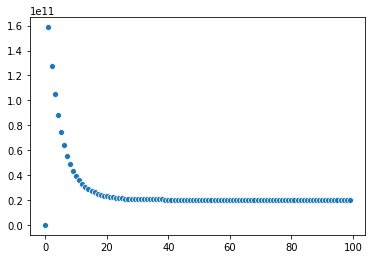

In [5]:
J_history = np.array([0, 0])
for iters in range(1, iterations):
    hypothesis = train_x * theta.transpose()
    theta = theta - alpha * 1/m * (sum(np.multiply(train_x, (hypothesis - train_y))))
    J_history = np.vstack((J_history, np.array([iters, compute_cost(train_x, train_y, theta)])))
print('theta', theta)
print(compute_cost(train_x, train_y, theta))
sns.scatterplot(x=J_history[:, 0], y=J_history[:, 1])

Text(0, 0.5, 'Insurance Cost')

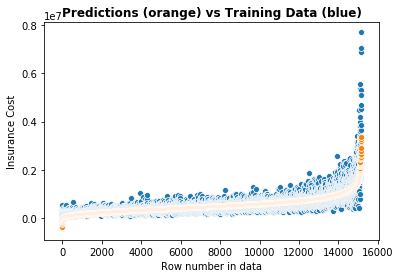

In [8]:
# see how model fits 
guess1 = np.zeros(2)
reality1 = np.zeros(2)
for index in range(train_x.shape[0]): # range is number of rows in training set
    b = data.iloc[index]
    price = np.reshape(data.iloc[index, :-1].to_numpy(), (1,theta.shape[1])) * theta.T
    guess1 = np.vstack([guess1, np.array([index, price], dtype=object)])
    reality1 = np.vstack([reality1, np.array([index, b['price']], dtype=object)]) 
graph1 = np.concatenate((guess1, reality1), axis=1)
graph1 = np.delete(graph1, 0, axis=1)
graph1 = np.delete(graph1, 1, axis=1)
graph1 = np.delete(graph1, 0, axis=0)
graph1 = graph1[np.lexsort(np.fliplr(graph1).T)]
index1 = np.matrix(np.arange(train_x.shape[0])).T
graph1 = np.concatenate((index1, graph1), axis=1)
row1 = np.ravel(graph1[:, 0])
guess1 = np.ravel(graph1[:, 1])
reality1 = np.ravel(graph1[:, 2])

g1 = sns.scatterplot(x=row1, y=reality1)
sns.scatterplot(x=row1, y=guess1)

g1.set_title("Predictions (orange) vs Training Data (blue)", weight="bold")
g1.set_xlabel("Row number in data")
g1.set_ylabel("Insurance Cost")

Text(0, 0.5, 'Insurance Cost')

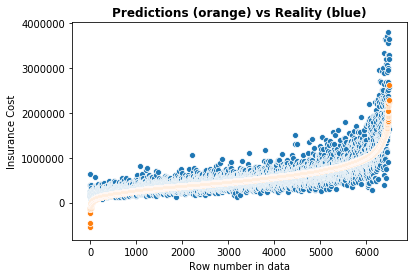

In [9]:
# guesses vs reality
guess = np.zeros(2)
reality = np.zeros(2)
for index in range(test_x.shape[0]):
    a = data.iloc[train_x.shape[0] + index]
    price = np.reshape(data.iloc[train_x.shape[0] + index, :-1].to_numpy(), (1,theta.shape[1])) * theta.T
    guess = np.vstack([guess, np.array([index, price], dtype=object)])
    reality = np.vstack([reality, np.array([index, a['price']], dtype=object)])
graph = np.concatenate((guess, reality), axis=1)
graph = np.delete(graph, 0, axis=1)
graph = np.delete(graph, 1, axis=1)
graph = np.delete(graph, 0, axis=0)
graph = graph[np.lexsort(np.fliplr(graph).T)]
index = np.matrix(np.arange(test_x.shape[0])).T
graph = np.concatenate((index, graph), axis=1)
row = np.ravel(graph[:, 0])
guess = np.ravel(graph[:, 1])
reality = np.ravel(graph[:, 2].flatten())

g = sns.scatterplot(x=row, y=reality)
sns.scatterplot(x=row, y=guess)

g.set_title("Predictions (orange) vs Reality (blue)", weight="bold")
g.set_xlabel("Row number in data")
g.set_ylabel("Insurance Cost")